In [1]:
import polars as pl

# Eager API

It is possible to run polars in eagar mode, which is basically the same as pandas.
Let's try that out first before we move onto the more interesting lazy API.


In [2]:
df = (
    #
    pl.read_csv("data/uber.csv", use_pyarrow=True).with_columns(
        pl.col("pickup_datetime").str.to_datetime("%Y-%m-%d %H:%M:%S UTC")
    )
    #
)

df.head()

column_0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
i64,datetime[ns],f64,datetime[μs],f64,f64,f64,f64,i64
24238194,2015-05-07 19:52:06.000000300,7.5,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217,1
27835199,2009-07-17 20:04:56.000000200,7.7,2009-07-17 20:04:56,-73.994355,40.728225,-73.99471,40.750325,1
44984355,2009-08-24 21:45:00.000000610,12.9,2009-08-24 21:45:00,-74.005043,40.74077,-73.962565,40.772647,1
25894730,2009-06-26 08:22:21.000000100,5.3,2009-06-26 08:22:21,-73.976124,40.790844,-73.965316,40.803349,3
17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df.select(pl.mean("passenger_count"))

passenger_count
f64
1.684535


In [4]:
fare_amount_bins = (
    df.select(
        pl.col("fare_amount")
        .cut([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
        .alias("fare_amount_bins")
    )
    .group_by("fare_amount_bins")
    .count()
    .sort("fare_amount_bins")
)

fare_amount_bins

fare_amount_bins,count
cat,u32
"""(0, 10]""",124944
"""(10, 20]""",54635
"""(20, 30]""",10234
"""(30, 40]""",4491
"""(50, 60]""",2043
"""(40, 50]""",3068
"""(90, 100]""",43
"""(60, 70]""",219
"""(70, 80]""",141


In [5]:
fare_amount_bins.plot.barh(
    x="fare_amount_bins", y="count", title="Number of rides per fare amount bin"
)

%opts magic unavailable (pyparsing cannot be imported)
%compositor magic unavailable (pyparsing cannot be imported)


:Bars   [fare_amount_bins]   (count)

# Lazy API

Okay, so the eager API is basically PySpark. Very simple and easy to work with.
I am much more interested in the lazy API. What does that look like?

Let's replicate our binarisation problem into the Lazy API and see how that
goes.


In [8]:
lf = (
    pl.scan_csv("data/uber.csv")
    .with_columns(pl.col("pickup_datetime").str.to_datetime("%Y-%m-%d %H:%M:%S UTC"))
    .select(
        pl.col("fare_amount")
        .cut([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
        .alias("fare_amount_bins")
    )
    .group_by("fare_amount_bins")
    .count()
    .sort("fare_amount_bins")
)

lf

<LazyFrame [2 cols, {"fare_amount_bins": Categorical(ordering='physical'), "count": UInt32}] at 0x7F31A63E07D0>

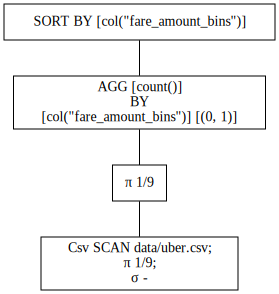

In [9]:
lf.show_graph()

In [15]:
print(lf.explain(optimized=False), lf.explain(optimized=True), sep="\n\n\n\n")

SORT BY [col("fare_amount_bins")]
  AGGREGATE
  	[count()] BY [col("fare_amount_bins")] FROM
     SELECT [col("fare_amount").cut().alias("fare_amount_bins")] FROM
       WITH_COLUMNS:
       [col("pickup_datetime").str.strptime([String(raise)])]

          Csv SCAN data/uber.csv
          PROJECT */9 COLUMNS



SORT BY [col("fare_amount_bins")]
  AGGREGATE
  	[count()] BY [col("fare_amount_bins")] FROM
     SELECT [col("fare_amount").cut().alias("fare_amount_bins")] FROM

        Csv SCAN data/uber.csv
        PROJECT 1/9 COLUMNS


Iterestingly, the parsing of the datetime doesn't happen in the optimised
query plan!! Now that is VERY cool. So we don't have to worry about what's
"optimal" and, instead, can just let the query planner figure that out.

Now I'm very excited...


In [10]:
lf.collect()

fare_amount_bins,count
cat,u32
"""(0, 10]""",124944
"""(10, 20]""",54635
"""(20, 30]""",10234
"""(30, 40]""",4491
"""(50, 60]""",2043
"""(40, 50]""",3068
"""(90, 100]""",43
"""(60, 70]""",219
"""(70, 80]""",141


# Streaming API

Okay - I'm now excited - let's explore how the streaming API works. I'd be very
keen to see how easy that is to work with.

It apparently just uses the same lazy API. So we can reuse our `lf` variable.


In [16]:
lf.collect(streaming=True)

fare_amount_bins,count
cat,u32
"""(0, 10]""",124944
"""(10, 20]""",54635
"""(20, 30]""",10234
"""(30, 40]""",4491
"""(50, 60]""",2043
"""(40, 50]""",3068
"""(90, 100]""",43
"""(60, 70]""",219
"""(70, 80]""",141


Okay that's a little bit anti-climatic. I think if we wanted to test this, we'd
need to generate data that's larger than memory to prove this works. A task for
another time!
